#Markov Network for USD Direction Prediction: Documentation

##Introduction
This notebook provides documentation for a Markov Network model designed to infer the direction of the US Dollar based on various economic and financial factors. The model uses probabilistic graphical modeling to capture the relationships between different economic indicators and their collective influence on USD movement.



---



##**Table of Contents**

###1. Markov Networks Overview
###2. Model Design
###3. Economic Factors and Relationships
###4. Inference Engine
###5. Using the Model
###6. Evaluation and Backtesting
###7. Limitations and Extensions

---

##1. Markov Networks Overview
Markov Networks (also called Markov Random Fields) are a type of probabilistic graphical model that represent joint distributions through undirected graphs. They are particularly useful for modeling systems where there are mutual dependencies between variables, which makes them well-suited for financial market analysis.

###Key Concepts

Nodes: Each node represents a random variable (in our case, economic factors)
Edges: Undirected connections between nodes that represent direct dependencies
Factors/Potentials: Functions that define compatibility between variables
Joint Distribution: In Markov networks, the joint distribution is proportional to the product of all factors

###Mathematical Representation
For variables $X = {X_1, X_2, ..., X_n}$, the joint distribution is:

$P(X)=\frac{1}{Z} \prod_{c \in C} \phi_c(X_c)$

Where:
$Z$ is a normalization constant (partition function)

$C$ is the set of cliques in the graph

$\phi_c$ are the potential functions for each clique

$X_c$ are the variables in clique $c$

In [2]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [3]:
# US Dollar Direction Inference using Markov Networks
# Google Colab Script

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import VariableElimination
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import random
from IPython.display import display, HTML

# Set random seed for reproducibility
np.random.seed(42)

##2. Model Design

Our Markov Network model for USD direction prediction follows a careful design process:

**Variables in the Model**

The model includes the following variables:

**USD_Direction**: The target variable we want to predict (Down, Stable, or Up)

**Economic Factor**s: 16 different economic indicators that influence USD direction

In [4]:
# Define the factors influencing USD direction
factors = [
    'USD_Direction',
    'Supply_Demand',
    'Economic_Performance',
    'Interest_Rates',
    'Monetary_Policy',
    'Inflation',
    'Trade_Balance',
    'Commodity_Prices',
    'Geopolitical_Risk',
    'Political_Stability',
    'Risk_Appetite',
    'Capital_Flows',
    'Investor_Savings',
    'Demand_Shifts',
    'Reserve_Holdings',
    'Speculation',
    'Technical_Indicators'
]

# Create a Markov Network model
model = MarkovNetwork()

# Add all nodes to the model
model.add_nodes_from(factors)

# Define the graph structure (edges between related factors)
# These relationships are based on economic theory and market dynamics
edges = [
    ('USD_Direction', 'Supply_Demand'),
    ('USD_Direction', 'Economic_Performance'),
    ('USD_Direction', 'Interest_Rates'),
    ('USD_Direction', 'Monetary_Policy'),
    ('USD_Direction', 'Inflation'),
    ('USD_Direction', 'Trade_Balance'),
    ('USD_Direction', 'Capital_Flows'),
    ('USD_Direction', 'Technical_Indicators'),

    ('Interest_Rates', 'Monetary_Policy'),
    ('Interest_Rates', 'Inflation'),
    ('Interest_Rates', 'Economic_Performance'),

    ('Inflation', 'Monetary_Policy'),
    ('Inflation', 'Economic_Performance'),
    ('Inflation', 'Commodity_Prices'),

    ('Supply_Demand', 'Reserve_Holdings'),
    ('Supply_Demand', 'Demand_Shifts'),
    ('Supply_Demand', 'Trade_Balance'),

    ('Trade_Balance', 'Economic_Performance'),
    ('Trade_Balance', 'Commodity_Prices'),

    ('Political_Stability', 'Geopolitical_Risk'),
    ('Geopolitical_Risk', 'Risk_Appetite'),

    ('Capital_Flows', 'Risk_Appetite'),
    ('Capital_Flows', 'Interest_Rates'),
    ('Capital_Flows', 'Investor_Savings'),

    ('Technical_Indicators', 'Speculation'),
    ('Commodity_Prices', 'Speculation')
]

# Add edges to the model
model.add_edges_from(edges)

**Model Structure**

The structure of our Markov Network defines which variables directly influence each other:

##Network Visualization

Visualizing the Markov Network helps us understand the complex dependencies between economic factors:

<ipython-input-6-92a193b78e1d>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


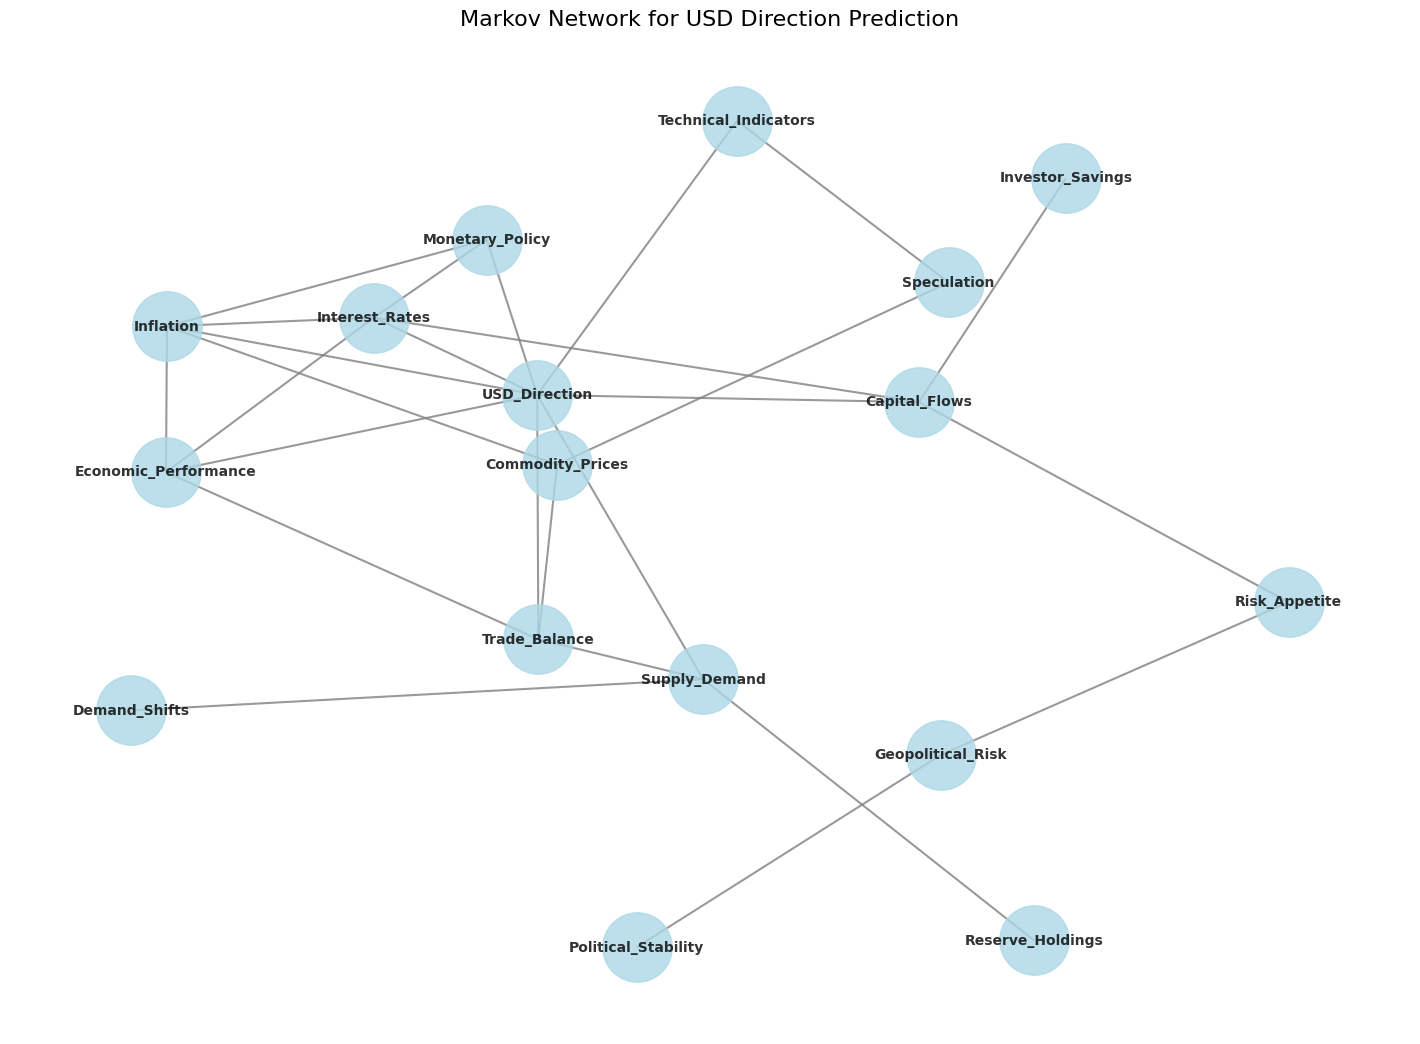

In [6]:
# Visualize the network structure
def visualize_markov_network(model):
    plt.figure(figsize=(14, 10))

    # Create a NetworkX graph from the model
    G = nx.Graph()
    G.add_nodes_from(model.nodes())
    G.add_edges_from(model.edges())

    # Generate a layout for the nodes
    pos = nx.spring_layout(G, k=0.9, seed=42)

    # Draw the network
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2500, font_size=10, font_weight='bold', edge_color='gray',
            width=1.5, alpha=0.8)

    plt.title('Markov Network for USD Direction Prediction', fontsize=16)
    plt.tight_layout()
    plt.show()

##3. Economic Factors and Relationships

The model incorporates economic theory to define relationships between variables:

States of Variables

Each variable has three possible states:


For economic factors: Low, Medium, High

For USD_Direction: Down, Stable, Up

In [ ]:
# Define the states for each variable
variable_states = {factor: ['Low', 'Medium', 'High'] for factor in factors}
variable_states['USD_Direction'] = ['Down', 'Stable', 'Up']

##Compatibility Factors

Compatibility factors (or potentials) define the likelihood of certain combinations of states:

In [ ]:
# Function to create normalized compatibility matrices
def create_compatibility_matrix(shape, bias=None):
    """Create a compatibility matrix with optional bias toward certain states."""
    if bias:
        # Start with a matrix of ones
        matrix = np.ones(shape)
        for idx, weight in bias:
            matrix[idx] *= weight
    else:
        # Random matrix with values between 0.5 and 1.5
        matrix = np.random.uniform(0.5, 1.5, shape)

    # Normalize to ensure values represent reasonable probabilities
    matrix = matrix / matrix.sum()
    return matrix

##Key Economic Relationships

Some of the key economic relationships encoded in our model:

In [ ]:
#Interest Rates and USD Direction: Higher interest rates typically strengthen a currency.

# Example: USD Direction and Interest Rates relationship
interest_usd_bias = [
    ((0, 2), 0.3),  # Down USD with High interest rates is less likely
    ((2, 2), 2.0),  # Up USD with High interest rates is more likely
    ((2, 0), 0.3)   # Up USD with Low interest rates is less likely
]

In [ ]:
# Inflation and USD Direction: Higher inflation typically weakens a currency

# Example: USD Direction and Inflation relationship
inflation_usd_bias = [
    ((0, 2), 2.0),  # Down USD with High inflation is more likely
    ((2, 2), 0.3),  # Up USD with High inflation is less likely
    ((2, 0), 1.8)   # Up USD with Low inflation is more likely
]

In [ ]:
# Economic Performance and USD Direction: Stronger economy typically strengthens a currency.

# Example: USD Direction and Economic Performance relationship
economy_usd_bias = [
    ((0, 2), 0.3),  # Down USD with Strong economy is less likely
    ((2, 2), 2.0),  # Up USD with Strong economy is more likely
    ((2, 0), 0.4)   # Up USD with Weak economy is less likely
]

##Factor Matrix Explanation
Let's examine a specific factor matrix to understand how these relationships are encoded:
<br>      
For the USD_Direction and Interest_Rates factor:
Shape is [3, 3] representing 3 states for each variable
<br><br>
The bias values increase or decrease the likelihood of specific combinations.

For example, ((2, 2), 2.0) means "Up USD with High interest rates" is twice as likely as the baseline.

<br>
Each cell in the matrix represents:

**Row:** USD_Direction state (0=Down, 1=Stable, 2=Up)

**Column:** Interest_Rates state (0=Low, 1=Medium, 2=High)

In [ ]:
# Approximate factor matrix for USD_Direction and Interest_Rates after applying bias
[
    [0.12, 0.12, 0.04],  # Down USD with Low/Medium/High interest rates
    [0.12, 0.12, 0.12],  # Stable USD with Low/Medium/High interest rates
    [0.04, 0.12, 0.24]   # Up USD with Low/Medium/High interest rates
]

##4. Inference Engine##

The inference engine is the core component that allows us to use the model to make predictions:
<br><br>
**Variable Elimination**

We use Variable Elimination, a common inference algorithm for probabilistic graphical models:

In [ ]:
# Create inference engine
inference = VariableElimination(model)

#How Variable Elimination Works#

Variable Elimination operates by:

Converting the Markov Network to a factor graph
<br><br>
*   Converting the Markov Network to a factor graph
*   Eliminating variables one by one by marginalizing them out
*   Computing the desired conditional probabilities
<br><br>

The algorithm computes:
<br><br>
$P(Query | Evidence) = \frac{P(Query, Evidence)}{P(Evidence)}$



<br><br>



#Inference Process#

The inference process takes evidence (observed economic factors) and predicts USD direction:

In [ ]:
def infer_usd_direction(evidence):
    """Perform inference to predict USD direction given the evidence."""
    # Convert string state names to integers if needed
    for var, val in list(evidence.items()):
        if isinstance(val, str):
            if val in variable_states.get(var, []):
                evidence[var] = variable_states[var].index(val)

    # Perform inference
    result = inference.query(variables=['USD_Direction'], evidence=evidence)
    return result

In [ ]:
#Example Evidence
#Evidence can be provided as a dictionary mapping variables to their observed states:

# Example: Strong economy scenario
evidence = {
    'Economic_Performance': 2,  # High
    'Interest_Rates': 2,        # High
    'Inflation': 0,             # Low
    'Trade_Balance': 2,         # Surplus
    'Political_Stability': 2,   # High
}

# Perform inference
result = infer_usd_direction(evidence)

In [ ]:
#Interpreting Results
#The inference engine returns a probability distribution over possible USD directions:

def interpret_results(result):
    """Interpret the probability distribution of USD direction."""
    states = variable_states['USD_Direction']

    # Extract the probability values
    probs = result.values

    # Normalize if needed
    if abs(probs.sum() - 1.0) > 1e-6:
        probs = probs / probs.sum()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=states, y=probs)
    plt.title('Probability Distribution of USD Direction')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    for i, p in enumerate(probs):
        plt.text(i, p + 0.02, f'{p:.3f}', ha='center')

    plt.tight_layout()
    plt.show()

    most_likely = states[np.argmax(probs)]
    print(f"Most likely USD direction: {most_likely} ({probs.max():.3f})")

5. Using the Model
Predefined Economic Scenarios
The model comes with several predefined scenarios:

In [ ]:
def generate_evidence(scenario):
    """Generate evidence for variables based on the given scenario."""
    evidence = {}

    if scenario == "strong_economy":
        evidence = {
            'Economic_Performance': 2,  # High
            'Interest_Rates': 2,        # High
            'Inflation': 0,             # Low
            'Trade_Balance': 2,         # Surplus
            'Political_Stability': 2,   # High
        }

    elif scenario == "weak_economy":
        evidence = {
            'Economic_Performance': 0,  # Low
            'Interest_Rates': 0,        # Low
            'Inflation': 2,             # High
            'Trade_Balance': 0,         # Deficit
            'Political_Stability': 1,   # Medium
        }

    # Other scenarios omitted for brevity

    return evidence

In [ ]:
#Running Scenario Analysis

def analyze_scenarios():
    """Analyze multiple predefined scenarios."""
    scenarios = ["strong_economy", "weak_economy", "high_inflation", "geopolitical_tension"]

    results = {}

    for scenario in scenarios:
        print(f"\n===== Scenario: {scenario.replace('_', ' ').title()} =====")
        evidence = generate_evidence(scenario)

        # Display the evidence
        evidence_display = {}
        for var, state in evidence.items():
            evidence_display[var] = variable_states.get(var, ['Low', 'Medium', 'High'])[state]

        print("Evidence:")
        for var, state in evidence_display.items():
            print(f"  - {var.replace('_', ' ')}: {state}")

        # Perform inference
        result = infer_usd_direction(evidence)
        direction, probs = interpret_results(result)

        results[scenario] = {
            'direction': direction,
            'probabilities': probs,
            'evidence': evidence_display
        }

    return results

In [ ]:
#Custom Scenario Analysis
#Users can also create custom scenarios:

def set_custom_evidence():
    """Create a user interface for setting custom evidence."""
    custom_evidence = {}

    print("Set custom evidence for the Markov Network:")
    print("For each factor, enter 0 (Low), 1 (Medium), 2 (High), or leave blank to omit.")

    # Implementation details omitted for brevity

    return custom_evidence

In [ ]:
# 6. Evaluation and Backtesting
#The model includes functionality for backtesting with synthetic data:

def backtest_model(periods=100):
    """Generate synthetic time series data and backtest the model."""
    # Generate synthetic data
    df = generate_time_series(periods)

    # Discretize the data
    df_discrete = discretize_factors(df)

    # Infer USD direction
    usd_predictions = infer_usd_time_series(df_discrete)

    # Add predictions to dataframe
    df['USD_Direction_Predicted'] = usd_predictions

    # Generate "actual" USD direction
    df['USD_Direction_Actual'] = df.apply(simplified_usd_model, axis=1)

    # Calculate accuracy
    accuracy = sum(df['USD_Direction_Predicted'] == df['USD_Direction_Actual']) / len(df)
    print(f"Model accuracy: {accuracy:.2f}")

    # Visualization code omitted for brevity

    return df, accuracy

In [ ]:
#Generating synthetic data

def generate_time_series(periods=100):
    """Generate synthetic time series data for all factors."""
    # Implementation details omitted for brevity
    return df

In [ ]:
#Discretizing continuous values

def discretize_factors(df):
    """Convert continuous factor values to discrete states (0, 1, 2)."""
    df_discrete = df.copy()

    for col in df.columns:
        # Use quantiles to divide into Low, Medium, High
        boundaries = [0, 0.33, 0.67, 1.0]
        df_discrete[col] = pd.cut(df[col],
                                 bins=boundaries,
                                 labels=[0, 1, 2],
                                 include_lowest=True)

    return df_discrete.astype(int)

#7. Limitations and Extensions#

#Limitations#

**Simplistic States**: The model uses only three states (Low, Medium, High) for each variable, which may not capture nuanced relationships.

**Synthetic Data**: Our backtesting relies on synthetic data, which may not accurately reflect real market dynamics.

**Static Model**: The current model is static and doesn't adapt to changing market conditions over time.

**Markov Assumption**: The model assumes the Markov property, which may not hold for all economic relationships.

**Expert-Defined Relationships**: The factor potentials are defined based on expert knowledge rather than learned from data.

<br>

#Possible Extensions#

**Learning from Data**: Use historical data to learn the factor potentials automatically.

**Dynamic Model**: Extend to a Dynamic Markov Network that adapts relationships over time.

**Continuous Variables**: Use continuous distributions instead of discrete states.

**More Economic Factors**: Incorporate additional economic indicators and market signals.

**Hierarchical Structure**: Implement a hierarchical model that groups related economic factors.

**Integration with Other Models**: Combine with time series models or deep learning approaches.

<br>


#Conclusion#

This Markov Network model provides a probabilistic framework for understanding and predicting USD direction based on economic factors. While it has limitations, it offers a structured way to encode economic relationships and perform inference about currency movements.

The model can be used for:

* Understanding the influence of different economic factors on USD direction
* Scenario analysis to explore potential market outcomes
* Building more sophisticated currency forecasting systems


By integrating domain knowledge from economics with probabilistic modeling, this approach provides both predictive power and interpretability, which is valuable for financial analysis and decision-making.